# 1.0 Importing Dependecies:

In [1]:
# Importing dependecies:
import re
import sys
import string
import pandas as pd
import numpy as np

# Tokenizers
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim.models as gs
from gensim.models.phrases import Phrases, Phraser

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring Notebook environment:
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (10.0, 7.5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.


# 2.0 Importing Data:

In [17]:
df = pd.read_json('data/strings/recipes_raw_nosource_fn.json')
df_1 = pd.read_json('data/strings/recipes_raw_nosource_epi.json')
df_2 = pd.read_json('data/strings/recipes_raw_nosource_ar.json')
df.head()

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,QaFfhzgVliz840HdAnIypaGteQn5q3K,2ZlbPBIZEDWBdGFcJ/KhApHyOTYvt.G,8zGobobyDsaZYEw2dC0aOx5OMhA.TK6,GFhRq1LHg7bITZxzrQAdN1vt4U/9AXq,1NTEgJqoZSeiOR3lIYJpY6MdJy8J9oe,bB.av.HvROUULt52UwCNhYjmFwFMcEe,R1AQFiWULG/FuRSEB/.qFwcAbj.Phu.,RrewJ0.1fBlHmLH3BaXji7y2D08.KKK,z8enrwKc4Z3gxVmuxOKMZI/6GKSt1N2,pKpcLCAbXuvJJA3IZVlEhNjhOsBw15K,1Yls1UOBlB8tCWEQBJud.hEpzr15KIC,MoNU9eS8AI7BA07L/NbQkMgMdAhU43W,0HTC6/JWf4bJnNhpnYq8wqdew1bjJfO,HhWW9P3PtcVFgJa0A/ILP1QkY9u.XV2,6EcFqHg6GCifvTAJ/wqdNPIQJKhpyLi,WGZp7rKLW7ZheJIAtz/P8ZRzz7mqmlS,q68RErl7vzM2apk72GE/pEn0CVOEZry,esOZ0jNZz7beIh14E0KO/W8x/K/jRve,HwwWzw4M8OFnirNJvatbCn1k8TAtHc.,5t9WTRW1LmAZijA8EHHZ9v5LAhGfDOu,3sIf1qZuDOUV.tbEkqvAZGRfGLlTCgC,V5GdC6vvg9J71EWy50B55LojJoBZMjG,k3nUcqWBqw04GVwcooooX4QgMIhNObC,Sr5NOGRwFL2Et29RpmmnmgggA.9QAHK,QSFgCm1C3roLQYIYcnNmQHcKv11woyG,USvt1m2a7RwPmcqzD0/Au3VIrhP1RfS,h.BGRIoIdDmHwh72bF0aoCOluCXKkqW,wosCcAjyrLqlGtKyeu3SrclW91lI8n.,WPeQwcG9YD7MZrMQ4FdAlRS5LkZAdrC,zPd4EpB9aJLKw7nDkKoLv68L2kyNVU2,ygpfQqCl4qS.B5rEE3XBmCfJcqY3KMu,51qro2lQOQbj.oGlsu9NbnQF83QjUuK,JyR61cAN81XDUH0elFITpIuPO0Wwnqa,wg7Frz5wokYazNqF7awKz/s/iXZX/5e,/qlwIX5k7wiNvn/1FTAH0QbLp2BVsWi,BOj.9Z7aA2FJTIKXqDuyPCVoWr9goAq,Ayq3syHvYUYoss1fz2Wv.UvyHUIN3wq,73ftuME6qPNdYWIlaky2J0XOJOvAMJu,ZP4/HHU4BtVBSfMUrUekTgSuFWdQEHC,xcjKuDBYLjAZU2Lc.xx7JHP5uwlh9.6,...,lzaOMqkwdxVjuOxLKVVVqiferVjhYKC,sXkr7XqYsvDLQzf3iPQOUU3pn0XO0hu,HrBzYP6FYOeIz36c7JyHdDxCj.EUs3u,G1druF7Jjry2yp4ALb8yrujeH5E4Sgu,sbWsONW8oqRO1CeH0XoRb1IrWF6lR66,wBHuOMyXrxWIGAhqPpZq8gYbYsECPge,V9HttwxFZ9aWluciKbhkVL.gXih9plu,MaZr1vLXiaUCaD6kxNQVX6NADIJxV7e,1QTk67BlaayW/PDb.e4L1imW0h0k79.,PxzSmYV76PI3ZZhrcFVC.z4SRx/WTAa,mkLvC4mucuxz8HznaZnv35u47XLCuOW,KsSDe3Imt60kFl7HeXFtqTnFaQ6lH7y,uhyQziyPlQm9.M58TlwQRljNoYVbEka,MYv2s2yDC7y5bAdY/Ebx7DDOY1NCjsK,Hyvs81Px7TVnyHEEhAiJJxjuviBdfR6,bpz9N2jObyJztLtzDhbDmnhX7.A3hC2,JhEGtpTV3uK89R3CxJ/0OPCIFewbeXG,RbtaeWxrrbVorgoJ0r6h0Rfi..sXQey,zhbWtPvCCzqLJOrXGe3FFBKwOTBmgOa,iK1IfL2jdQ60IqURoDdmzJU9XBhWLPW,1qL/FdX8S8.yaPQeSemXK0s2YCd5DdK,287hbwi.mjELP3k7q7vye7wMiN4Wh1W,.OnpU7Sv4uhZKWqG8QQBMqpzc92.pM.,U3i6cq5uT4M9Txzbn9IuOaQiUIPw3hW,MQAS8Dkmou9z.lp1MUvzVOdewGNL712,O3biElBi6G64bACtflU/ieI5TTQH8PW,w9X11wHJW14wVago.hufHUbC3rc/5CK,T2e30s7InFsyB4AVwNO4PMKt7FoweRW,IAxuGiMpvSJJhM0CIAt4r0NA9QYdv3y,FztHcktuaHKx7c6iN9Wz3wglKR.Djb2,SbuzjJ2X59.G47dIGzSilzuBCdLKeWm,/O6xDCwFukk7Tjy.wlc3z2xCjo688d.,M1gsyE32rg9BZjbEr9iYyr0bgq9ZedW,WKttZAMEU7.UfktDmxovEh8990RPKdm,CKug/Ejc6CP9FttAUIwBb65EKel43Eu,3R1S2jJXzb7ZPRV1KqXqolDvTcPrCUO,fxCsQzUFds4E.o4os3oZKd0rMNXqaNG,IQw/IdK0RwsP3HfPg9RyB.oRrBVBwwW,20Ymhyrxi/SkQBALrwWa.PqF6n.dto6,SkW5b1Rx.510iURG2vRz18u/dNUhZ62,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,"In a large saucepan, heat 3 cups of chicken st...",Special equipment: a deep fryer with lid or a ...,MIX ingredients in 2-qt. microwaveable bowl.\n...,1. Pierce the meat all over with a fork and pl...,Cut the duck in quarters and remove the drumst...,"For Pie Dough:\nCombine f

# 3.0 Cleaning Data:

## Transposing Data:

In [18]:
df_clean = df.transpose().drop('picture_link', axis=1)
df_clean = df_clean[['title', 'ingredients', 'instructions']]
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,"[1/2 cup celery, finely chopped, 1 small green...",Toss ingredients lightly and spoon into a butt...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Watch how to make this recipe.\nSprinkle the s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,"[1 1/2 cups dried black beans, picked over and...","In a large saucepan, let the beans soak in eno..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Watch how to make this recipe.\nPreheat the ov...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Special equipment: sushi mat\nCook the brown r...


## Dropping NaN Values:

In [22]:
df_clean.isnull().values.any()
print("Number of row that have missing values:\n", df_clean.isna().sum())

True

Number of row that have missing values:
 title           289
ingredients     237
instructions    411
dtype: int64


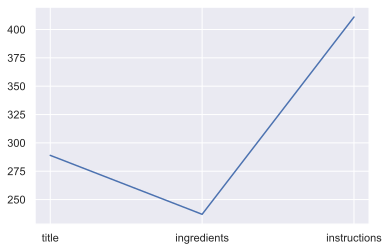

In [23]:
plt.plot(df_clean.isna().sum())

Dropping missing values since we won't loose too much data.

In [24]:
df_clean.dropna(inplace=True)

In [25]:
# Filling some recipes with the name of the title since they are not considered as null:
df_clean['ingredients'] = np.where(df_clean['ingredients'].isnull(), df_clean['title'], df_clean['ingredients'])

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59628 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 3 columns):
title           59628 non-null object
ingredients     59628 non-null object
instructions    59628 non-null object
dtypes: object(3)
memory usage: 1.8+ MB


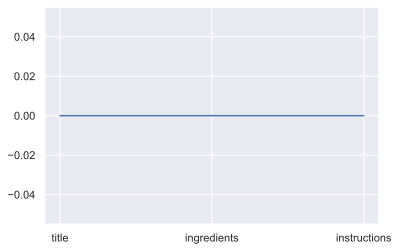

In [27]:
plt.plot(df_clean.isna().sum())

## Lower Case:

In [28]:
df_clean['title'] = df_clean['title'].apply(lambda x: x.lower())
df_clean['ingredients'] = [[words.lower() for words in text] for text in df_clean['ingredients']]
df_clean['instructions'] = df_clean['instructions'].apply(lambda x: x.lower())
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblet's deviled crab,"[1/2 cup celery, finely chopped, 1 small green...",toss ingredients lightly and spoon into a butt...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,"[2 pounds skirt steak, cut into 1/2-inch dice,...",watch how to make this recipe.\nsprinkle the s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,"[1 1/2 cups dried black beans, picked over and...","in a large saucepan, let the beans soak in eno..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,"[1 1/4 pounds ground chuck, one 15-ounce can t...",watch how to make this recipe.\npreheat the ov...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",special equipment: sushi mat\ncook the brown r...


## Removing Punctuation

In [29]:
df_clean["title"] = df_clean['title'].str.replace('[^\w\s]','')
df_clean["ingredients"] = [''.join(c for c in s if c not in string.punctuation) for s in df_clean["ingredients"]]
df_clean["ingredients"] = [''.join(c for c in s if c not in string.punctuation) for s in df_clean["ingredients"]]
df_clean["instructions"] = df_clean['instructions'].str.replace('[^\w\s]','')
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,12 cup celery finely chopped1 small green pepp...,toss ingredients lightly and spoon into a butt...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,2 pounds skirt steak cut into 12inch dicekoshe...,watch how to make this recipe\nsprinkle the st...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,1 12 cups dried black beans picked over and ri...,in a large saucepan let the beans soak in enou...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,1 14 pounds ground chuckone 15ounce can tomato...,watch how to make this recipe\npreheat the ove...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,1 cup rice brown mediumgrain cooked12cup quino...,special equipment sushi mat\ncook the brown ri...


## Removing Numbers

In [30]:
df_clean["title"] = df_clean['title'].str.replace('\d+','')
df_clean["ingredients"] = [''.join(c for c in s if c not in string.digits) for s in df_clean['ingredients']]
df_clean["instructions"] = df_clean['instructions'].str.replace('\d+','')
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,cup celery finely chopped small green pepper ...,toss ingredients lightly and spoon into a butt...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,pounds skirt steak cut into inch dicekosher s...,watch how to make this recipe\nsprinkle the st...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked over and rinse...,in a large saucepan let the beans soak in enou...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,pounds ground chuckone ounce can tomato sauc...,watch how to make this recipe\npreheat the ove...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,cup rice brown mediumgrain cookedcup quinoacu...,special equipment sushi mat\ncook the brown ri...


## Removing Stop Words

In [31]:
df_clean['ingredients'].str.contains('and')
df_clean['instructions'].str.contains('and')

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi    False
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO     True
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK     True
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK    False
kRBQSWtqYWqtkb34FGeenBSbC32gIdO    False
                                   ...  
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW     True
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m     True
f/coffo2TMs2J2gq5nTOUIqH2TRAkui     True
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS    False
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm    False
Name: ingredients, Length: 59628, dtype: bool

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi    True
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO    True
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK    True
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK    True
kRBQSWtqYWqtkb34FGeenBSbC32gIdO    True
                                   ... 
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW    True
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m    True
f/coffo2TMs2J2gq5nTOUIqH2TRAkui    True
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS    True
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm    True
Name: instructions, Length: 59628, dtype: bool

In [32]:
stop_words = stopwords.words('english')
print(stop_words)

df_clean["ingredients"] = [' '.join(i for i in x.split() if i not in stop_words) for x in df_clean['ingredients']]
df_clean["instructions"] = df_clean['instructions'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_clean.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,cup celery finely chopped small green pepper f...,toss ingredients lightly spoon buttered baking...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,pounds skirt steak cut inch dicekosher salt fr...,watch make recipe sprinkle steak salt pepper s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups wate...,large saucepan let beans soak enough cold wate...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,pounds ground chuckone ounce tomato sauce teas...,watch make recipe preheat oven degrees f brown...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,cup rice brown mediumgrain cookedcup quinoacup...,special equipment sushi mat cook brown rice qu...


In [33]:
df_clean['ingredients'].str.contains('and')
df_clean['instructions'].str.contains('and')

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi    False
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO    False
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK    False
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK    False
kRBQSWtqYWqtkb34FGeenBSbC32gIdO    False
                                   ...  
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW    False
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m    False
f/coffo2TMs2J2gq5nTOUIqH2TRAkui    False
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS    False
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm    False
Name: ingredients, Length: 59628, dtype: bool

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi    False
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO    False
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK    False
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK    False
kRBQSWtqYWqtkb34FGeenBSbC32gIdO    False
                                   ...  
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW    False
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m    False
f/coffo2TMs2J2gq5nTOUIqH2TRAkui     True
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS     True
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm    False
Name: instructions, Length: 59628, dtype: bool

## Remove meassurements

In [34]:
# Defining measurement words and prep words:
measure_tokens = ['cup', 'can', 'teaspoon', 'tsp', 'tablespoon', 'tbsp', 'pound', 'lb', 'jar', 'bottle', 'stick', 'about', 'pounds','cups'
                  'pinch', 'appx', 'half', 'optional', 'milliter', 'micro', 'ounce', 'small', 'large', 'medium', 'envelope', 
                  'ear', 'piece', 'drops', 'oz', 'bunch', 'slice', 'spoonful', 'advertisement']

prep_tokens = ['diced', 'stewed', 'chopped', 'crumbled', 'peeled', 'minced', 'fresh', 'divided', 'cooked', 'washed', 'softened',
               'sliced', 'deveined', 'shaken', 'finely', 'toasted', 'frozen', 'mixed', 'cut', 'squeezed', 'cracked', 'halved',
               'roasted', 'grilled','dried', 'freshly', 'ground', 'coarse', 'beaten', 'blend', 'blended', 'seeded', 
               'grated', 'chilled', 'garnish', 'discarded', 'powdered', 'cooled', 'sifted', 'drained', 'granulated', 'crushed']

In [35]:
df_clean["ingredients"] = [' '.join(i for i in x.split() if i not in measure_tokens and prep_tokens) for x in df_clean['ingredients']]
df_clean["instructions"] = df_clean['instructions'].apply(lambda x: ' '.join([word for word in x.split() if word not in measure_tokens and prep_tokens]))
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chop...,toss ingredients lightly spoon buttered baking...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cra...,watch make recipe sprinkle steak salt pepper s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups wate...,saucepan let beans soak enough cold water cove...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly groun...,watch make recipe preheat oven degrees f brown...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup swe...,special equipment sushi mat cook brown rice qu...


In [36]:
df_clean['ingredients'].str.contains('cup')
df_clean['instructions'].str.contains('cup')
df_clean.head()

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi     True
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO     True
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK     True
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK     True
kRBQSWtqYWqtkb34FGeenBSbC32gIdO     True
                                   ...  
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW    False
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m    False
f/coffo2TMs2J2gq5nTOUIqH2TRAkui     True
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS    False
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm     True
Name: ingredients, Length: 59628, dtype: bool

p3pKOD6jIHEcjf20CCXohP8uqkG5dGi    False
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO    False
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK     True
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK    False
kRBQSWtqYWqtkb34FGeenBSbC32gIdO     True
                                   ...  
4bfMWxlbKhx/McJq/89k0SBdw.VvAzW    False
T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m    False
f/coffo2TMs2J2gq5nTOUIqH2TRAkui    False
q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS    False
7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm     True
Name: instructions, Length: 59628, dtype: bool

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chop...,toss ingredients lightly spoon buttered baking...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cra...,watch make recipe sprinkle steak salt pepper s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups wate...,saucepan let beans soak enough cold water cove...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly groun...,watch make recipe preheat oven degrees f brown...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup swe...,special equipment sushi mat cook brown rice qu...


## Creating New Columns For Vectors:

In [37]:
df_clean['ingredients_vector'] = df_clean['ingredients']
df_clean['instructions_vector'] = df_clean['instructions']
df_clean.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chop...,toss ingredients lightly spoon buttered baking...,celery finely chopped green pepper finely chop...,toss ingredients lightly spoon buttered baking...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cra...,watch make recipe sprinkle steak salt pepper s...,skirt steak cut inch dicekosher salt fresh cra...,watch make recipe sprinkle steak salt pepper s...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups wate...,saucepan let beans soak enough cold water cove...,cups dried black beans picked rinsed cups wate...,saucepan let beans soak enough cold water cove...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly groun...,watch make recipe preheat oven degrees f brown...,ground chuckone tomato sauce saltfreshly groun...,watch make recipe preheat oven degrees f brown...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup swe...,special equipment sushi mat cook brown rice qu...,rice brown mediumgrain cookedcup quinoacup swe...,special equipment sushi mat cook brown rice qu...


## Phrase Embedding:

In [ ]:
# df_clean['ingredients_vector'] = Phrases(df_clean['ingredients_vector'])
# df_clean['instructions_vector'] = Phrases(df_clean['instructions_vector'])
# df_clean.head()

## Sentence Tokenizer:

In [ ]:
# df_clean['ingredients_vector'] = df_clean['ingredients_vector'].apply(sent_tokenize)
# df_clean['instructions_vector'] = df_clean['instructions_vector'].apply(sent_tokenize)
# df_clean.head()

## Word Tokenizer:

In [38]:
df_clean['ingredients_vector'] = df_clean['ingredients_vector'].apply(word_tokenize)
df_clean['instructions_vector'] = df_clean['instructions_vector'].apply(word_tokenize)
df_clean.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,grammie hamblets deviled crab,celery finely chopped green pepper finely chop...,toss ingredients lightly spoon buttered baking...,"[celery, finely, chopped, green, pepper, finel...","[toss, ingredients, lightly, spoon, buttered, ..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,infineon raceway baked beans,skirt steak cut inch dicekosher salt fresh cra...,watch make recipe sprinkle steak salt pepper s...,"[skirt, steak, cut, inch, dicekosher, salt, fr...","[watch, make, recipe, sprinkle, steak, salt, p..."
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,southwestern black bean dip,cups dried black beans picked rinsed cups wate...,saucepan let beans soak enough cold water cove...,"[cups, dried, black, beans, picked, rinsed, cu...","[saucepan, let, beans, soak, enough, cold, wat..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,sour cream noodle bake,ground chuckone tomato sauce saltfreshly groun...,watch make recipe preheat oven degrees f brown...,"[ground, chuckone, tomato, sauce, saltfreshly,...","[watch, make, recipe, preheat, oven, degrees, ..."
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,sushi renovation,rice brown mediumgrain cookedcup quinoacup swe...,special equipment sushi mat cook brown rice qu...,"[rice, brown, mediumgrain, cookedcup, quinoacu...","[special, equipment, sushi, mat, cook, brown, ..."


## Saving cleaned DF for Analysis and Training:m

In [57]:
df_clean.to_csv(path_or_buf='data/strings/df_clean.csv')

## Dropping and Cleaning Columns:

In [69]:
df_clean_loaded = pd.read_csv('data/strings/df_clean.csv', index_col=0)
df_clean_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59628 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 5 columns):
title                  59628 non-null object
ingredients            58153 non-null object
instructions           59612 non-null object
ingredients_vector     59628 non-null object
instructions_vector    59628 non-null object
dtypes: object(5)
memory usage: 2.7+ MB


In [70]:
# Filling some recipes with the name of the title since they are not considered as null:
df_clean_loaded['ingredients'] = np.where(df_clean_loaded['ingredients'].isnull(), df_clean_loaded['title'], df_clean_loaded['ingredients'])

In [73]:
df_clean_loaded[df_clean_loaded.isna().any(axis=1)]

,title,ingredients,instructions,ingredients_vector,instructions_vector
DxsP.opjapGRa4zq4XMrI5M2Zz6EGue,title,rice milk wheat,NaN,"['rice', 'milk', 'wheat']",[]
uvcjJ07lrvDkPRXKUcA8CrKLgJbD4hq,southern stuffing,cups brioche country ham cubed ounces butter o...,NaN,"['cups', 'brioche', 'country', 'ham', 'cubed',...",[]
nR3sz.W1PSU74zn8m3NDDYC96iEI.lW,title,acerola,NaN,['acerola'],[]
GsAQK3AG..YxEw7lKIy3PcZ31MY1FEG,gas station cue,dry rub choice tri tip roast rack pork baby ba...,NaN,"['dry', 'rub', 'choice', 'tri', 'tip', 'roast'...",[]
GTI7DQPe/IIaXmQbITOlrtAiykcHiie,dark chocolate as a snack,dark chocolate,NaN,"['dark', 'chocolate']",[]
76zDLGsfc5S.M60Zgn9PqbONi4Ky2yO,new england stuffing,cups sourdough bread cubed toasted slab bacon ...,NaN,"['cups', 'sourdough', 'bread', 'cubed', 'toast...",[]
6AdCFCZR4cr1NzOtloWzWuOmDewvFGG,title,title,NaN,[],[]
CIpbN9qEZeLIg0YNW8aC6zwfR8CRYte,real time cooking out of the fridge and pantry,garlicgingerthin soy saucerice wine vinegarses...,NaN,"['garlicgingerthin', 'soy', 'saucerice', 'wine...",[]
yJcaFDZcwAdeOxs2pIhWRz72Xnz/ysC,title,tablespoons unsalted butter chopped onions tab...,NaN,"['tablespoons', 'unsalted', 'butter', 'chopped...",[]
pKBZl5/whnhq65P6/TbUjEfQ0jM85Se,southwest stuffing,cups country white bread cubed toasted cups wh...,NaN,"['cups', 'country', 'white', 'bread', 'cubed',...",[]


In [75]:
df_clean_loaded = df_clean_loaded.dropna()
df_clean_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59612 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 5 columns):
title                  59612 non-null object
ingredients            59612 non-null object
instructions           59612 non-null object
ingredients_vector     59612 non-null object
instructions_vector    59612 non-null object
dtypes: object(5)
memory usage: 2.7+ MB


In [79]:
df_clean_loaded.to_csv(path_or_buf='data/strings/df_clean.csv')

## Vectorizing Columns:

In [ ]:
df_clean_test = pd.DataFrame()
ingredients_model = gs.Word2Vec(df_clean['ingredients_vector'], min_count=1, size= 50, workers=3, window=3, sg=1)
instructions_model = gs.Word2Vec(df_clean['instructions_vector'], min_count=1, size= 50, workers=3, window=3, sg=1)

In [ ]:
print(model)
data = model.most_similar('chicken')
print(data)

In [ ]:
df_clean_test['instructions_vectored'] = df_clean_test['ingredients'].word_index